In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
rankings=pd.read_csv('data/rankings.csv')
rankings.head()

,Unnamed: 0,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
matches=pd.read_csv('data/matches.csv')
matches.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
worldcup=pd.read_csv('data/worldcup-2018.csv')
worldcup.head()
worldcup=worldcup.loc[:,['Team','Group','First match \nagainst','Second match\n against','Third match\n against']]

# Cleaning Data

In [5]:
rankings.head()

,Unnamed: 0,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
rankings=rankings.loc[:,['rank','rank_date','country_full','country_abrv','cur_year_avg_weighted','last_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted']]
rankings.head()

,rank,rank_date,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted
0,1,1993-08-08,Germany,GER,0.0,0.0,0.0,0.0
1,2,1993-08-08,Italy,ITA,0.0,0.0,0.0,0.0
2,3,1993-08-08,Switzerland,SUI,0.0,0.0,0.0,0.0
3,4,1993-08-08,Sweden,SWE,0.0,0.0,0.0,0.0
4,5,1993-08-08,Argentina,ARG,0.0,0.0,0.0,0.0


In [7]:
rankings.info()
# convert rank_date to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   rank_date                57793 non-null  object 
 2   country_full             57793 non-null  object 
 3   country_abrv             57793 non-null  object 
 4   cur_year_avg_weighted    57793 non-null  float64
 5   last_year_avg_weighted   57793 non-null  float64
 6   two_year_ago_weighted    57793 non-null  float64
 7   three_year_ago_weighted  57793 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.5+ MB


In [8]:
rankings['rank_date']=pd.to_datetime(rankings['rank_date'])

In [9]:
rankings['country_full'].unique()#change IR Iran to Iran

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [10]:
rankings=rankings.replace({'IR Iran':'Iran'})

In [11]:
# lets make columns to represent total points
rankings['total_points']=rankings['cur_year_avg_weighted']+rankings['last_year_avg_weighted']+rankings['two_year_ago_weighted']+rankings['three_year_ago_weighted']
rankings.head()

,rank,rank_date,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,total_points
0,1,1993-08-08,Germany,GER,0.0,0.0,0.0,0.0,0.0
1,2,1993-08-08,Italy,ITA,0.0,0.0,0.0,0.0,0.0
2,3,1993-08-08,Switzerland,SUI,0.0,0.0,0.0,0.0,0.0
3,4,1993-08-08,Sweden,SWE,0.0,0.0,0.0,0.0,0.0
4,5,1993-08-08,Argentina,ARG,0.0,0.0,0.0,0.0,0.0


In [12]:
matches.info()
#convert date to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39654 entries, 0 to 39653
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  39654 non-null  int64 
 1   date        39654 non-null  object
 2   home_team   39654 non-null  object
 3   away_team   39654 non-null  object
 4   home_score  39654 non-null  int64 
 5   away_score  39654 non-null  int64 
 6   tournament  39654 non-null  object
 7   city        39654 non-null  object
 8   country     39654 non-null  object
 9   neutral     39654 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 2.8+ MB


In [13]:
matches['date']=pd.to_datetime(matches['date'])

In [14]:
matches['home_team'].unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland', 'USA',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Czechoslovakia', 'Switzerland', 'Sweden',
       'Germany', 'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg',
       'Russia', 'Denmark', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'China', 'Australia', 'Lithuania', 'Turkey', 'Mexico', 'Aruba',
       'Egypt', 'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya',
       'Bolivia', 'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus',
       'El Salvador', 'Barbados', 'Ireland', 'Trinidad and Tobago',
       'Greece', 'Curaçao', 'Dominica', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guyana', 'Cuba', 'Colombia', 'Ecuador',
       'St. Kitts and Nevis', 'Panama', 'Slovakia', 'Manchukuo',
       'Croatia', 'Nicaragua', 'Afghanistan', 

In [15]:
matches['away_team'].unique()

array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
       'Argentina', 'Hungary', 'Czechoslovakia', 'Uruguay', 'France',
       'Austria', 'Switzerland', 'Netherlands', 'Belgium', 'Germany',
       'Norway', 'Sweden', 'Italy', 'Chile', 'Finland', 'Russia',
       'Luxembourg', 'Denmark', 'Brazil', 'USA', 'Philippines', 'Estonia',
       'El Salvador', 'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland',
       'Portugal', 'Spain', 'Romania', 'Australia', 'Mexico', 'China',
       'New Zealand', 'Latvia', 'Guatemala', 'Curaçao', 'Bulgaria',
       'Lithuania', 'Turkey', 'Egypt', 'South Africa', 'Jamaica', 'Japan',
       'Ireland', 'Uganda', 'Bolivia', 'Haiti', 'Trinidad and Tobago',
       'Kenya', 'Ukraine', 'Honduras', 'Nicaragua', 'Greece', 'Guyana',
       'Peru', 'Aruba', 'Martinique', 'Barbados', 'Cuba', 'Israel',
       'Indonesia', 'Suriname', 'St. Lucia', 'Ecuador', 'Venezuela',
       'Grenada', 'India', 'Panama', 'Slovakia', 'Croatia', 'Lebanon',
       'Manch

In [16]:
matches['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'USA', 'Uruguay',
       'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Japan', 'Brazil', 'Paraguay', 'China', 'Canada',
       'Estonia', 'Guatemala', 'Czechoslovakia', 'Spain', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Peru', 'Honduras', 'British Guyana', 'Uganda',
       'El Salvador', 'Barbados', 'Irish Free State',
       'Trinidad and Tobago', 'Greece', 'Curaçao', 'Egypt', 'Dominica',
       'Guadeloupe', 'Palestine', 'Netherlands Guyana', 'French Guyana',
       'Colombia', 'St. Kitts and Nevis', 'Éire', 'Panama',
       'Bohemia and Moravia', 'Slovakia', 'Manchur

In [17]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Team                   32 non-null     object
 1   Group                  32 non-null     object
 2   First match 
against   32 non-null     object
 3   Second match
 against  32 non-null     object
 4   Third match
 against   32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


In [18]:
worldcup['Team'].unique()#Costarica

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Porugal', 'Spain',
       'Morocco', 'IRAN', 'France', 'Australia', 'Peru', 'Denmark',
       'Argentina', 'Iceland', 'Croatia', 'Nigeria', 'Brazil',
       'Switzerland', 'Costarica', 'Serbia', 'Germany', 'Mexico',
       'Sweden', 'Korea', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Poland', 'Senegal', 'Columbia', 'Japan', nan], dtype=object)

In [19]:
a='Third match\n against'
worldcup[a].unique()#Columbia

array(['Uruguay', 'Egypt', 'Saudi Arabia', 'Russia', 'Iran', 'Morocco',
       'Spain', 'Portugal', 'Denmark', 'Peru', 'Australia', 'France',
       'Nigeria', 'Croatia', 'Iceland', 'Argentina', 'Serbia',
       'Costarica', 'Switzerland', 'Brazil', 'Korea', 'Sweden', 'Mexico',
       'Germany', 'England', 'Tunisia', 'Panama', 'Belgium', 'Japan',
       'Columbia', 'Senegal', 'Poland', nan], dtype=object)

In [74]:
worldcup=worldcup.replace({'Columbia':'Colombia','Costarica':'Costa Rica','Korea':'Korea Republic','Porugal':'Portugal','IRAN':'Iran'})
worldcup=worldcup.dropna(how='all')

In [21]:
worldcup


,Team,Group,First match \nagainst,Second match\n against,Third match\n against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia
4,Porugal,B,Spain,Morocco,Iran
5,Spain,B,Portugal,Iran,Morocco
6,Morocco,B,Iran,Portugal,Spain
7,IRAN,B,Morocco,Spain,Portugal
8,France,C,Australia,Peru,Denmark
9,Australia,C,France,Denmark,Peru


In [22]:
worldcup.set_index('Team')
worldcup

,Team,Group,First match \nagainst,Second match\n against,Third match\n against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia
4,Porugal,B,Spain,Morocco,Iran
5,Spain,B,Portugal,Iran,Morocco
6,Morocco,B,Iran,Portugal,Spain
7,IRAN,B,Morocco,Spain,Portugal
8,France,C,Australia,Peru,Denmark
9,Australia,C,France,Denmark,Peru


# Feature Extraction

In [24]:
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()
  
rankings

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,total_points
0,2003-01-15,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
1,2003-01-16,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
2,2003-01-17,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
3,2003-01-18,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
4,2003-01-19,204.0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1830653,2018-06-03,113.0,Zimbabwe,ZIM,136.13,84.98,51.35,14.09,286.55
1830654,2018-06-04,113.0,Zimbabwe,ZIM,136.13,84.98,51.35,14.09,286.55
1830655,2018-06-05,113.0,Zimbabwe,ZIM,136.13,84.98,51.35,14.09,286.55
1830656,2018-06-06,113.0,Zimbabwe,ZIM,136.13,84.98,51.35,14.09,286.55


In [25]:
matches.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [29]:
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,total_points
0,17833,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,59.0,Bolivia,BOL,0.0,0.0,0.0,0.0,0.0
1,17834,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,8.0,Brazil,BRA,0.0,0.0,0.0,0.0,0.0
2,17835,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,35.0,Ecuador,ECU,0.0,0.0,0.0,0.0,0.0
3,17836,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,65.0,Guinea,GUI,0.0,0.0,0.0,0.0,0.0
4,17837,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,67.0,Paraguay,PAR,0.0,0.0,0.0,0.0,0.0


In [31]:
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,total_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,last_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,total_points_away
0,17833,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,...,0.0,1993-08-08,22.0,Uruguay,URU,0.0,0.0,0.0,0.0,0.0
1,17834,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,...,0.0,1993-08-08,14.0,Mexico,MEX,0.0,0.0,0.0,0.0,0.0
2,17835,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,...,0.0,1993-08-08,94.0,Venezuela,VEN,0.0,0.0,0.0,0.0,0.0
3,17836,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,...,0.0,1993-08-08,86.0,Sierra Leone,SLE,0.0,0.0,0.0,0.0,0.0
4,17837,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,...,0.0,1993-08-08,5.0,Argentina,ARG,0.0,0.0,0.0,0.0,0.0


# Feature Generation

In [34]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['total_points_home'] - matches['total_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

matches.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,last_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,total_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,17833,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,...,0.0,0.0,0.0,0.0,37.0,40.5,0.0,2,True,True
1,17834,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,...,0.0,0.0,0.0,0.0,-6.0,11.0,0.0,0,False,False
2,17835,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,...,0.0,0.0,0.0,0.0,-59.0,64.5,0.0,5,True,True
3,17836,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,...,0.0,0.0,0.0,0.0,-21.0,75.5,0.0,1,True,False
4,17837,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,...,0.0,0.0,0.0,0.0,62.0,36.0,0.0,-2,False,True


# Modeling

In [35]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

In [36]:
x, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], matches['is_won']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [38]:
logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=3)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
predicted = model.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.70      0.67      0.68      1896
        True       0.65      0.68      0.67      1741

    accuracy                           0.68      3637
   macro avg       0.68      0.68      0.68      3637
weighted avg       0.68      0.68      0.68      3637



Text(0.5, 1.0, 'AUC score is 0.74')

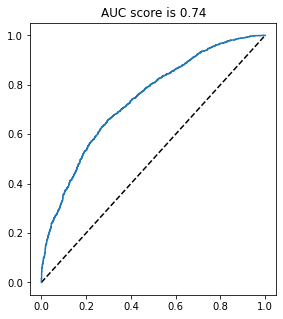

In [42]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))

# predicting World Cup Winner

In [65]:
worldcup=worldcup.set_index('Team')

In [119]:
margin = 0.025 # if probablity of win is between 0.475 to 0.52 then we should see it as draw

# let's define the rankings at the time of the World Cup (so we sort on most recent rankings)
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(worldcup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings.head()

,rank_date,rank,country_abrv,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,total_points
country_full,,,,,,,,
Argentina,2018-06-07,5.0,ARG,404.07,404.80,248.99,183.59,1241.45
Australia,2018-06-07,36.0,AUS,366.60,193.77,98.16,59.79,718.32
Belgium,2018-06-07,3.0,BEL,629.98,322.82,158.94,186.58,1298.32
Brazil,2018-06-07,2.0,BRA,558.95,541.18,168.06,162.38,1430.57
Colombia,2018-06-07,16.0,COL,292.09,327.78,199.73,166.38,985.98


In [133]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

worldcup['points'] = 0
worldcup['total_prob'] = 0

# We iterate through each game in the schedule, doing each group at a time
for group in set(worldcup['Group']):
    print('___Starting group {}:___'.format(group))

    for home, away in combinations(worldcup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=x_test.columns)

        # Get features for each team competiting in the fixture
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        # get the prediction proability of the home team winning
        home_win_prob = model.predict_proba(row)[:,1][0]
        worldcup.loc[home, 'total_prob'] += home_win_prob
        worldcup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        # Allocate points 
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            worldcup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            worldcup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            worldcup.loc[home, 'points'] += 1
            worldcup.loc[away, 'points'] += 1

___Starting group C:___
France vs. Australia: France wins with 0.53
France vs. Peru: Draw
France vs. Denmark: Draw
Australia vs. Peru: Peru wins with 0.57
Australia vs. Denmark: Denmark wins with 0.55
Peru vs. Denmark: Draw
___Starting group E:___
Brazil vs. Switzerland: Draw
Brazil vs. Costa Rica: Draw
Brazil vs. Serbia: Brazil wins with 0.54
Switzerland vs. Costa Rica: Draw
Switzerland vs. Serbia: Switzerland wins with 0.53
Costa Rica vs. Serbia: Draw
___Starting group H:___
Poland vs. Senegal: Draw
Poland vs. Colombia: Draw
Poland vs. Japan: Poland wins with 0.64
Senegal vs. Colombia: Draw
Senegal vs. Japan: Senegal wins with 0.53
Colombia vs. Japan: Colombia wins with 0.56
___Starting group G:___
Belgium vs. Panama: Belgium wins with 0.66
Belgium vs. Tunisia: Draw
Belgium vs. England: Draw
Panama vs. Tunisia: Tunisia wins with 0.57
Panama vs. England: England wins with 0.64
Tunisia vs. England: Draw
___Starting group D:___
Argentina vs. Iceland: Draw
Argentina vs. Croatia: Draw
Arg

In [132]:
worldcup=worldcup.set_index('Team')

In [134]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]
worldcup=worldcup.reset_index()
world_cup = worldcup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = worldcup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

next_round_wc.sort_values(by='Group')

,Group,First match \nagainst,Second match\n against,Third match\n against,points,total_prob
Team,,,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay,1,1.217296
Saudi Arabia,A,Russia,Uruguay,Egypt,1,1.245652
Spain,B,Portugal,Iran,Morocco,5,1.553870
Portugal,B,Spain,Morocco,Iran,7,1.611767
France,C,Australia,Peru,Denmark,5,1.528348
Australia,C,France,Denmark,Peru,0,1.358720
Iceland,D,Argentina,Nigeria,Croatia,3,1.512543
Argentina,D,Iceland,Croatia,Nigeria,5,1.598978
Brazil,E,Switzerland,Costa Rica,Serbia,5,1.533291


# Elemenation Round

In [135]:
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

# for each knockout stage
for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        # get the teams playing
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        
        # get the features for each team
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=x_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        # Get the winner
        home_win_prob = model.predict_proba(row)[:,1][0]
        
        # Display resultes
        if model.predict_proba(row)[:,1] < 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        # Display winning team and probability of victory
        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Russia vs. Spain: Spain wins with probability 0.81
France vs. Iceland: France wins with probability 0.50
Brazil vs. Mexico: Mexico wins with probability 0.52
Belgium vs. Senegal: Belgium wins with probability 0.52
Saudi Arabia vs. Portugal: Portugal wins with probability 0.89
Australia vs. Argentina: Argentina wins with probability 0.61
Switzerland vs. Germany: Switzerland wins with probability 0.51
Panama vs. Poland: Poland wins with probability 0.72


___Starting of the quarterfinal___
Spain vs. France: France wins with probability 0.50
Mexico vs. Belgium: Belgium wins with probability 0.51
Portugal vs. Argentina: Argentina wins with probability 0.50
Switzerland vs. Poland: Switzerland wins with probability 0.50


___Starting of the semifinal___
France vs. Belgium: Belgium wins with probability 0.50
Argentina vs. Switzerland: Switzerland wins with probability 0.50


___Starting of the final___
Belgium vs. Switzerland: Switzerland wins with probabilit